In [13]:
# Load all data, libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


file_path = 'Dataset/final_weather_data.nc'

ds = xr.open_dataset(file_path)

# Check Data
print(ds)
print(ds['t2m'].values.shape)
print(f"t2m min/max: {np.min(ds['t2m'].values):.2f}K / {np.max(ds['t2m'].values):.2f}K")


<xarray.Dataset> Size: 458MB
Dimensions:    (time: 35064, latitude: 11, longitude: 33)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 281kB 2021-01-01 ... 2024-12-31T23:00:00
    surface    float64 8B ...
  * latitude   (latitude) float64 88B 49.0 48.75 48.5 48.25 ... 47.0 46.75 46.5
  * longitude  (longitude) float64 264B 9.5 9.75 10.0 10.25 ... 17.0 17.25 17.5
Data variables:
    d2m        (time, latitude, longitude) float32 51MB ...
    t2m        (time, latitude, longitude) float32 51MB ...
    sp         (time, latitude, longitude) float32 51MB ...
    u10        (time, latitude, longitude) float32 51MB ...
    v10        (time, latitude, longitude) float32 51MB ...
    tcc        (time, latitude, longitude) float32 51MB ...
    cp         (time, latitude, longitude) float32 51MB ...
    lsp        (time, latitude, longitude) float32 51MB ...
    tp         (time, latitude, longitude) float32 51MB ...
Attributes:
    GRIB_edition:            1
    G

In [2]:
print(ds.isnull().sum())  # Check for NaNs
print(ds.coords)          # Verify coordinates
print(ds.dims)            # Confirm dimensions

<xarray.Dataset> Size: 88B
Dimensions:  ()
Coordinates:
    number   int64 8B ...
    surface  float64 8B ...
Data variables:
    d2m      int64 8B 0
    t2m      int64 8B 0
    sp       int64 8B 0
    u10      int64 8B 0
    v10      int64 8B 0
    tcc      int64 8B 0
    cp       int64 8B 0
    lsp      int64 8B 0
    tp       int64 8B 0
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 281kB 2021-01-01 ... 2024-12-31T23:00:00
    surface    float64 8B ...
  * latitude   (latitude) float64 88B 49.0 48.75 48.5 48.25 ... 47.0 46.75 46.5
  * longitude  (longitude) float64 264B 9.5 9.75 10.0 10.25 ... 17.0 17.25 17.5
FrozenMappingWarningOnValuesAccess({'time': 35064, 'latitude': 11, 'longitude': 33})


In [3]:
print("Time range:", ds.time.values[0], "to", ds.time.values[-1])
print("Number of time steps:", len(ds.time))
print("Time step example:", ds.time.values[1] - ds.time.values[0])

Time range: 2021-01-01T00:00:00.000000000 to 2024-12-31T23:00:00.000000000
Number of time steps: 35064
Time step example: 3600000000000 nanoseconds


In [7]:
# Temperature (convert Kelvin to °C)
t2m_c = ds['t2m'] - 273.15
print("Temperature (°C) min:", t2m_c.min().values, "max:", t2m_c.max().values)

# Surface Pressure (convert Pa to hPa)
sp_mm = ds['sp'] / 100
print("Surface Pressure (hPa) min:", sp_mm.min().values, "max:", sp_mm.max().values)

# Precipitation (convert meters to mm)
tp_c = ds['tp'] * 1000
print("Precipitation (mm) min:", tp_c.min().values, "max:", tp_c.max().values)

cp_c = ds['cp'] * 1000
print("Convecived Precipitation (mm) min:", cp_c.min().values, "max:", cp_c.max().values)

lsp_c = ds['lsp'] * 1000
print("Large scale Precipitation (mm) min:", lsp_c.min().values, "max:", lsp_c.max().values)


Temperature (°C) min: -30.280243 max: 37.502594
Surface Pressure (hPa) min: 727.32623 max: 1030.4587
Precipitation (mm) min: 0.0 max: 20.45703
Convecived Precipitation (mm) min: 0.0 max: 13.957739
Large scale Precipitation (mm) min: 0.0 max: 16.366959


In [4]:
# Choose the time you want to inspect (e.g., the first time index)
time_index = 0  

# Extract values for cp, tp, and lsp for the chosen time
cp_values = ds['cp'].isel(time=time_index).values
tp_values = ds['tp'].isel(time=time_index).values
lsp_values = ds['lsp'].isel(time=time_index).values

# Compare cp + lsp with tp
comparison = cp_values + lsp_values

# Print the results
print("Convective Precipitation (cp) at time", time_index, ":\n", cp_values)
print("Large-Scale Precipitation (lsp) at time", time_index, ":\n", lsp_values)
print("Total Precipitation (tp) at time", time_index, ":\n", tp_values)

# Check if cp + lsp is approximately equal to tp
print("cp + lsp == tp at time", time_index, ":\n", np.allclose(comparison, tp_values))


Convective Precipitation (cp) at time 0 :
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.3841858e-07 1.0251999e-05 2.1219254e-05
  4.7683716e-05 4.8875809e-05 3.5524368e-05 1.6689301e-05 7.3909760e-06
  9.7751617e-06 5.0067902e-06 2.3841858e-07 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6689301e-06 9.7751617e-06 1.3589859e-05
  1.5258789e-05 1.6689301e-05 1.4543533e-05 6.1988831e-06 1.3589859e-05
  1.9788742e-05 7.6293945e-06 1.6689301e-06 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0

In [5]:
# Plot temperature at first time step
t2m_c.isel(time=0).plot(cmap='coolwarm')
plt.title("2m Temperature (°C) - 2021-01-01 00:00")
plt.show()

# Plot time series at a central grid point (e.g., lat=48, lon=14)
t2m_c.sel(latitude=48, longitude=14, method='nearest').plot()
plt.title("Temperature (°C) Time Series at 48°N, 14°E")
plt.show()

NameError: name 't2m_c' is not defined

In [12]:
# Koordinatendaten verifizieren

print("Latitude values:", ds.latitude.values)
print("Longitude values:", ds.longitude.values)

# Print min/max and size
print("Latitude range:", ds.latitude.min().values, "to", ds.latitude.max().values)
print("Longitude range:", ds.longitude.min().values, "to", ds.longitude.max().values)
print("Grid size:", ds.latitude.size, "x", ds.longitude.size)



Latitude values: [49.   48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5 ]
Longitude values: [ 9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25
 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25
 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5 ]
Latitude range: 46.5 to 49.0
Longitude range: 9.5 to 17.5
Grid size: 11 x 33


In [13]:
lat_diff = ds.latitude[1] - ds.latitude[0]
lon_diff = ds.longitude[1] - ds.longitude[0]
print("Latitude resolution:", lat_diff.values)
print("Longitude resolution:", lon_diff.values)


Latitude resolution: -0.25
Longitude resolution: 0.25


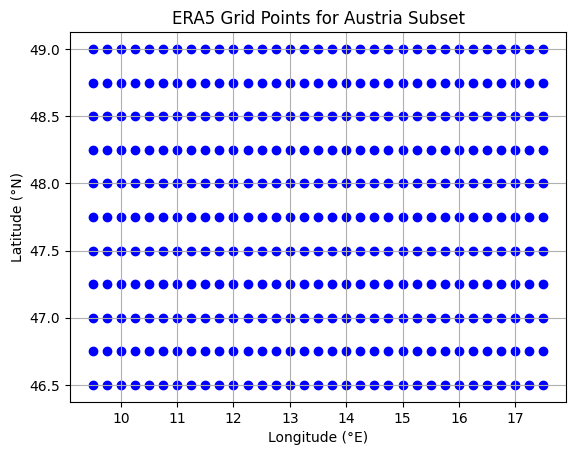

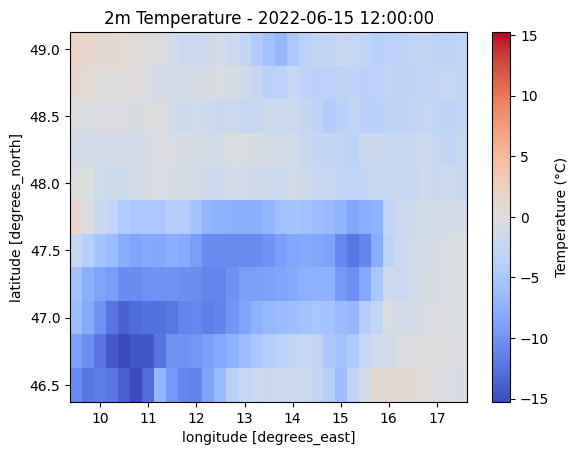

In [11]:
# Scatter plot of grid points
lon, lat = ds.longitude.values, ds.latitude.values
lon_grid, lat_grid = np.meshgrid(lon, lat)  # Create 2D grid
plt.scatter(lon_grid, lat_grid, c='blue', marker='o')
plt.xlabel("Longitude (°E)")
plt.ylabel("Latitude (°N)")
plt.title("ERA5 Grid Points for Austria Subset")
plt.grid(True)
plt.show()

# Temperature at first time step (convert Kelvin to °C)
t2m_c = ds['t2m'].isel(time=0) - 273.15
# Select June 15, 2022, 16:00
summer_date = ds['t2m'].sel(time='2022-06-15T16:00:00', method='nearest') - 273.15  # Convert to °C
t2m_c.plot(cmap='coolwarm', cbar_kwargs={'label': 'Temperature (°C)'})
plt.title("2m Temperature - 2022-06-15 12:00:00")
plt.show()

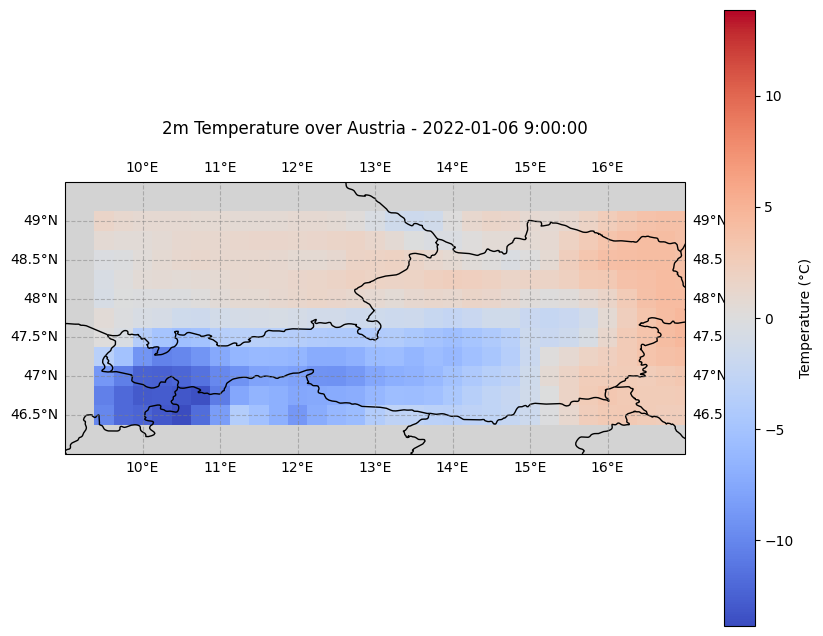

In [14]:

# Set up the figure and map projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on Austria
ax.set_extent([9, 17, 46, 49.5], crs=ccrs.PlateCarree())  # Austria’s approximate bounds

# Add map features
ax.add_feature(cfeature.BORDERS, linewidth=1)  # Country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

winter_date = ds['t2m'].sel(time='2022-01-06T9:00:00', method='nearest') - 273.15  # Convert to °C


# Plot the ERA5 data
winter_date.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # Match data’s coordinate system
    cmap='coolwarm',               # Color map for temperature
    cbar_kwargs={'label': 'Temperature (°C)'},  # Colorbar label
)

# Add gridlines with labels
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Title
plt.title("2m Temperature over Austria - 2022-01-06 9:00:00", pad=20)
plt.show()